In [1]:
# from previous analysis, get the optimal diff vector by visualizing the images in different datasets
# and manually select images to use

In [2]:
# because the stanford dataset is significantly larger than the other datasets;
# we can use some of the lesions in the stanford dataset as the "big" end of the diff vector
# and because the smallest ones in the other datasets are always very light in the middle area,
# so maybe select ones that are not too small...

In [3]:
import os
import os.path as osp
import sys
import torch
import numpy as np

/labs/gevaertlab/users/yyhhli/miniconda3/envs/lungvae38/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
sys.path.insert(1, '/labs/gevaertlab/users/yyhhli/code/vae/')

In [5]:

from datasets import PATCH_DATASETS
from datasets.utils import sitk2tensor
lidc_train = PATCH_DATASETS['LIDCPatchAugDataset'](
    root_dir=None, transform=sitk2tensor, split='train')
lidc_val = PATCH_DATASETS['LIDCPatchAugDataset'](
    root_dir=None, transform=sitk2tensor, split='val')
# get dataloaders
from torch.utils.data.dataloader import DataLoader
lidc_train_dataloader = DataLoader(
    dataset=lidc_train, batch_size=36, shuffle=False, drop_last=False, num_workers=4, pin_memory=False)
lidc_val_dataloader = DataLoader(
    dataset=lidc_val, batch_size=36, shuffle=False, drop_last=False, num_workers=4, pin_memory=False)

# import LNDB dataset
lndb_train = PATCH_DATASETS['LNDbPatch32Dataset'](
    root_dir=None, transform=sitk2tensor, split='train')
lndb_val = PATCH_DATASETS['LNDbPatch32Dataset'](
    root_dir=None, transform=sitk2tensor, split='val')
# lndb dataloader
lndb_train_dataloader = DataLoader(
    dataset=lndb_train, batch_size=36, shuffle=False, drop_last=False, num_workers=4, pin_memory=False)
lndb_val_dataloader = DataLoader(
    dataset=lndb_val, batch_size=36, shuffle=False, drop_last=False, num_workers=4, pin_memory=False)

# import stf dataset and dataloader
stf_train = PATCH_DATASETS['StanfordRadiogenomicsPatchDataset'](
    root_dir=None, transform=sitk2tensor, split='train')
stf_val = PATCH_DATASETS['StanfordRadiogenomicsPatchDataset'](
    root_dir=None, transform=sitk2tensor, split='val')
# stf dataloader
stf_train_dataloader = DataLoader(
    dataset=stf_train, batch_size=36, shuffle=False, drop_last=False, num_workers=4, pin_memory=False)
stf_val_dataloader = DataLoader(
    dataset=stf_val, batch_size=36, shuffle=False, drop_last=False, num_workers=4, pin_memory=False)


[11-02 15:39:12 | patch_ds:LIDCPatchAugDataset] patient split: train:699, val:88, test:88
[11-02 15:39:12 | patch_ds:LIDCPatchAugDataset] patch split: train, 32166
[11-02 15:39:12 | patch_ds:LIDCPatchAugDataset] patient split: train:699, val:88, test:88
[11-02 15:39:12 | patch_ds:LIDCPatchAugDataset] patch split: val, 4686
[11-02 15:39:12 | patch_ds:LNDbPatch32Dataset] patient split: train:168, val:22, test:22
[11-02 15:39:12 | patch_ds:LNDbPatch32Dataset] patch split: train, 805
[11-02 15:39:13 | patch_ds:LNDbPatch32Dataset] patient split: train:168, val:22, test:22
[11-02 15:39:13 | patch_ds:LNDbPatch32Dataset] patch split: val, 128
[11-02 15:39:13 | patch_stanfordradiogenomics:StanfordRadiogenomicsPatchDataset] patient split: train:100, test:43
[11-02 15:39:13 | patch_stanfordradiogenomics:StanfordRadiogenomicsPatchDataset] this dataset only has train/test splits, setting val as test
[11-02 15:39:13 | patch_stanfordradiogenomics:StanfordRadiogenomicsPatchDataset] patient split: trai

In [6]:
log_name="VAE3D32AUG"
version=70
vis_dir="/labs/gevaertlab/users/yyhhli/code/vae/EDA/image_synthesize_experiment/results/"

In [7]:
from evaluations.evaluator import ReconEvaluator
evaluator = ReconEvaluator(vis_dir=vis_dir, log_name=log_name, version=version)

[11-02 15:39:47 | instantiator:  <module>] Created a temporary directory at /tmp/tmpe__8l1l8
[11-02 15:39:47 | instantiator:    _write] Writing /tmp/tmpe__8l1l8/_remote_module_non_sriptable.py
[11-02 15:39:50 | patch_ds:LIDCPatchAugDataset] patient split: train:699, val:88, test:88
[11-02 15:39:50 | patch_ds:LIDCPatchAugDataset] patch split: train, 32166
[11-02 15:39:50 | patch_ds:LNDbPatch32AugDataset] patient split: train:168, val:22, test:22
[11-02 15:39:50 | patch_ds:LNDbPatch32AugDataset] patch split: train, 4830
[11-02 15:39:50 | patch_stanfordradiogenomics:StanfordRadiogenomicsPatchAugDataset] patient split: train:100, test:43


In [8]:
from evaluations.export import Exporter
lndb_exporter = Exporter(log_name=log_name, version=version,
                    dataloaders={"train": lndb_train_dataloader,
                                    "val": lndb_val_dataloader},
                    task_names=["LNDbTaskVolume"])
# get data
lndb_embeddings, data_names, lndb_label_dict = lndb_exporter.get_data()
lndb_embeddings_train = np.array(lndb_embeddings["train"])

[11-02 15:39:54 | patch_ds:LIDCPatchAugDataset] patient split: train:699, val:88, test:88
[11-02 15:39:54 | patch_ds:LIDCPatchAugDataset] patch split: train, 32166
[11-02 15:39:54 | patch_ds:LNDbPatch32AugDataset] patient split: train:168, val:22, test:22
[11-02 15:39:54 | patch_ds:LNDbPatch32AugDataset] patch split: train, 4830
[11-02 15:39:54 | patch_stanfordradiogenomics:StanfordRadiogenomicsPatchAugDataset] patient split: train:100, test:43
[11-02 15:39:54 | export:  Exporter] initializing embeddings
[11-02 15:39:59 | patch_ds:LIDCPatchAugDataset] patient split: train:699, val:88, test:88
[11-02 15:39:59 | patch_ds:LIDCPatchAugDataset] patch split: train, 32166
[11-02 15:39:59 | patch_ds:LNDbPatch32AugDataset] patient split: train:168, val:22, test:22
[11-02 15:39:59 | patch_ds:LNDbPatch32AugDataset] patch split: train, 4830
[11-02 15:39:59 | patch_stanfordradiogenomics:StanfordRadiogenomicsPatchAugDataset] patient split: train:100, test:43


 | 8.0 secs.


In [9]:
lidc_exporter = Exporter(log_name=log_name, version=version,
                    dataloaders={"train": lidc_train_dataloader,
                                    "val": lidc_val_dataloader},
                    task_names=["volume"])
# get data
lidc_embeddings, data_names, lidc_label_dict = lidc_exporter.get_data()
lidc_embeddings_train = np.array(lidc_embeddings["train"])

[11-02 15:40:07 | patch_ds:LIDCPatchAugDataset] patient split: train:699, val:88, test:88
[11-02 15:40:07 | patch_ds:LIDCPatchAugDataset] patch split: train, 32166
[11-02 15:40:07 | patch_ds:LNDbPatch32AugDataset] patient split: train:168, val:22, test:22
[11-02 15:40:07 | patch_ds:LNDbPatch32AugDataset] patch split: train, 4830
[11-02 15:40:07 | patch_stanfordradiogenomics:StanfordRadiogenomicsPatchAugDataset] patient split: train:100, test:43
[11-02 15:40:07 | export:  Exporter] initializing embeddings
[11-02 15:40:11 | patch_ds:LIDCPatchAugDataset] patient split: train:699, val:88, test:88
[11-02 15:40:11 | patch_ds:LIDCPatchAugDataset] patch split: train, 32166
[11-02 15:40:12 | patch_ds:LNDbPatch32AugDataset] patient split: train:168, val:22, test:22
[11-02 15:40:12 | patch_ds:LNDbPatch32AugDataset] patch split: train, 4830
[11-02 15:40:12 | patch_stanfordradiogenomics:StanfordRadiogenomicsPatchAugDataset] patient split: train:100, test:43


 | 63.0 secs.


In [10]:
stf_exporter = Exporter(log_name=log_name, version=version,
                    dataloaders={"train": stf_train_dataloader,
                                    "val": stf_val_dataloader},
                    task_names=["StfVolume"])
# get data
stf_embeddings, data_names, stf_label_dict = stf_exporter.get_data()
stf_embeddings_train = np.array(stf_embeddings["train"])

[11-02 15:41:17 | patch_ds:LIDCPatchAugDataset] patient split: train:699, val:88, test:88
[11-02 15:41:17 | patch_ds:LIDCPatchAugDataset] patch split: train, 32166
[11-02 15:41:17 | patch_ds:LNDbPatch32AugDataset] patient split: train:168, val:22, test:22
[11-02 15:41:17 | patch_ds:LNDbPatch32AugDataset] patch split: train, 4830
[11-02 15:41:17 | patch_stanfordradiogenomics:StanfordRadiogenomicsPatchAugDataset] patient split: train:100, test:43
[11-02 15:41:17 | export:  Exporter] initializing embeddings
[11-02 15:41:22 | patch_ds:LIDCPatchAugDataset] patient split: train:699, val:88, test:88
[11-02 15:41:22 | patch_ds:LIDCPatchAugDataset] patch split: train, 32166
[11-02 15:41:22 | patch_ds:LNDbPatch32AugDataset] patient split: train:168, val:22, test:22
[11-02 15:41:22 | patch_ds:LNDbPatch32AugDataset] patch split: train, 4830
[11-02 15:41:22 | patch_stanfordradiogenomics:StanfordRadiogenomicsPatchAugDataset] patient split: train:100, test:43


 | 5.0 secs.


In [11]:
lidc_volume = np.array(lidc_label_dict['volume']['train'])
print("lidc median:", np.median(lidc_volume))
lndb_volume = np.array(lndb_label_dict['LNDbTaskVolume']['train'])
print("lndb median:", np.median(lndb_volume))
stf_volume = np.array(stf_label_dict['StfVolume']['train'])
print("stf median:", np.median(stf_volume))

lidc median: 158.7219238281249
lndb median: 216.8279484561208
stf median: 12396.5


In [12]:
# visualize all the images
from utils.visualization import vis3d_tensor

In [13]:
def select_median_idx(data, n=36):
    idx = np.argsort(data)
    idx = idx[int(len(idx) / 2) - (n // 2):int(len(idx) / 2) + (n // 2)]
    return idx

In [14]:
lidc_median_idx = select_median_idx(lidc_volume)
lndb_median_idx = select_median_idx(lndb_volume)
stf_median_idx = select_median_idx(stf_volume)

In [15]:
# get embeddings
lidc_embeddings_median = torch.from_numpy(lidc_embeddings_train[lidc_median_idx][:,:2048]).type(torch.float32)
lndb_embeddings_median = torch.from_numpy(lndb_embeddings_train[lndb_median_idx][:,:2048]).type(torch.float32)
stf_embeddings_median = torch.from_numpy(stf_embeddings_train[stf_median_idx][:,:2048]).type(torch.float32)

In [16]:
# get images
lidc_median_imgs = evaluator.generate(lidc_embeddings_median)
lndb_median_imgs = evaluator.generate(lndb_embeddings_median)
stf_median_imgs = evaluator.generate(stf_embeddings_median)

In [17]:
# visualize
vis3d_tensor(lidc_median_imgs, save_path=osp.join(vis_dir, "lidc_median_imgs.jpeg"))
vis3d_tensor(lndb_median_imgs, save_path=osp.join(vis_dir, "lndb_median_imgs.jpeg"))
vis3d_tensor(stf_median_imgs, save_path=osp.join(vis_dir, "stf_median_imgs.jpeg"))


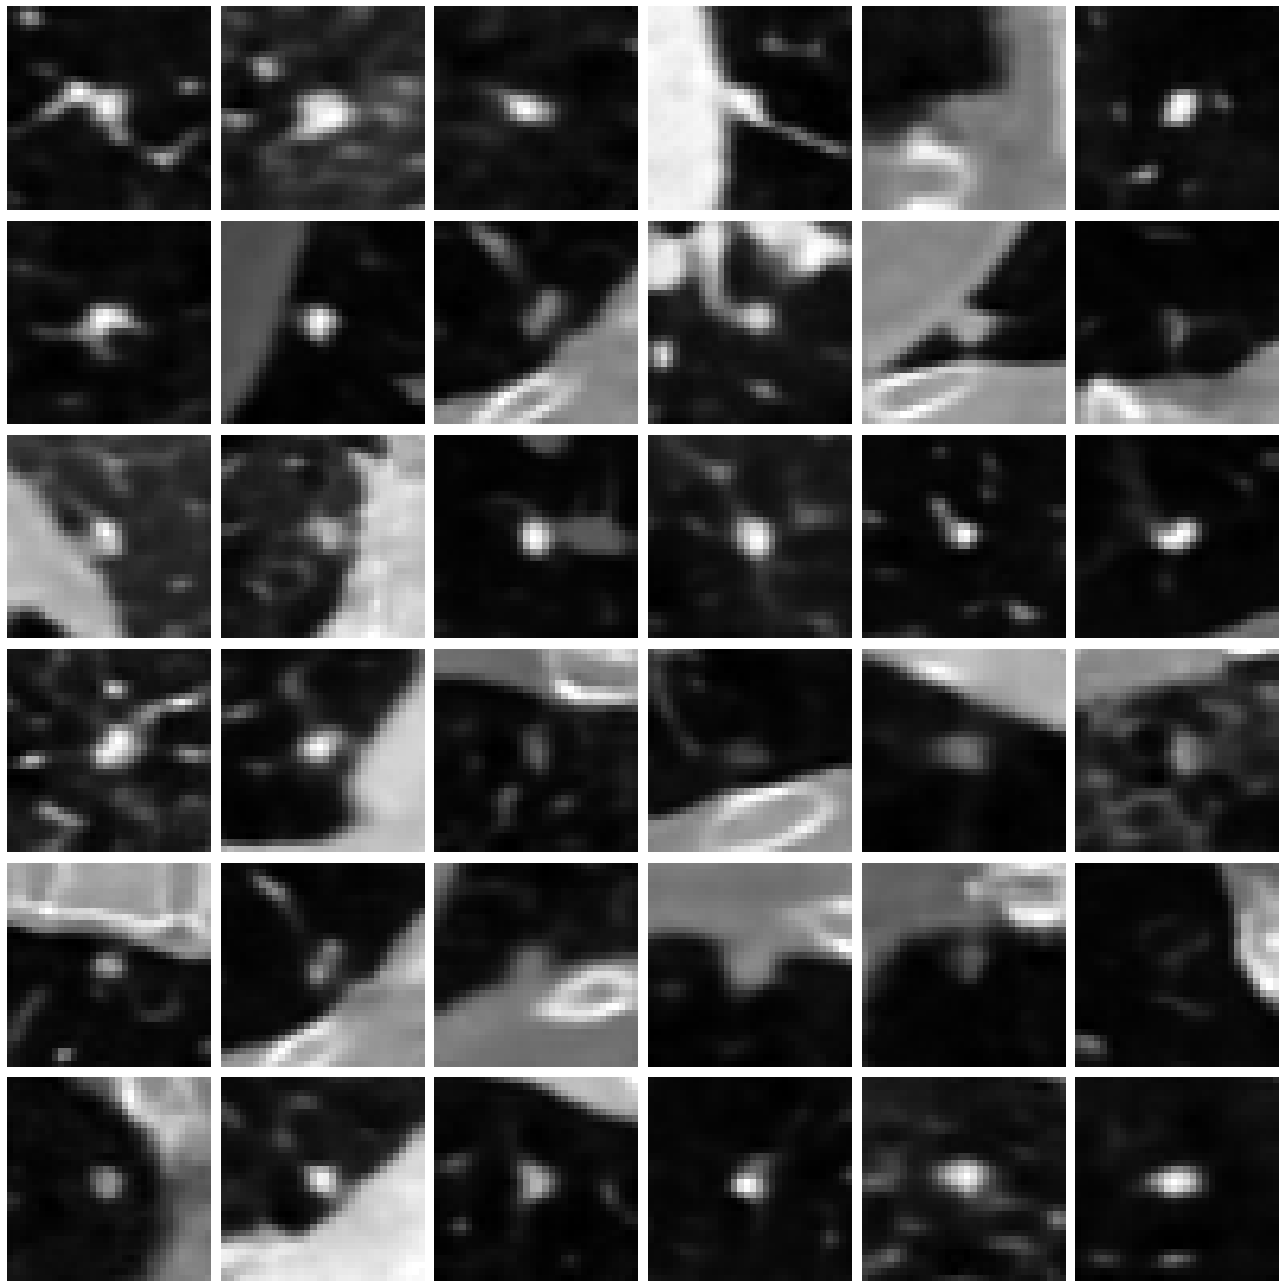

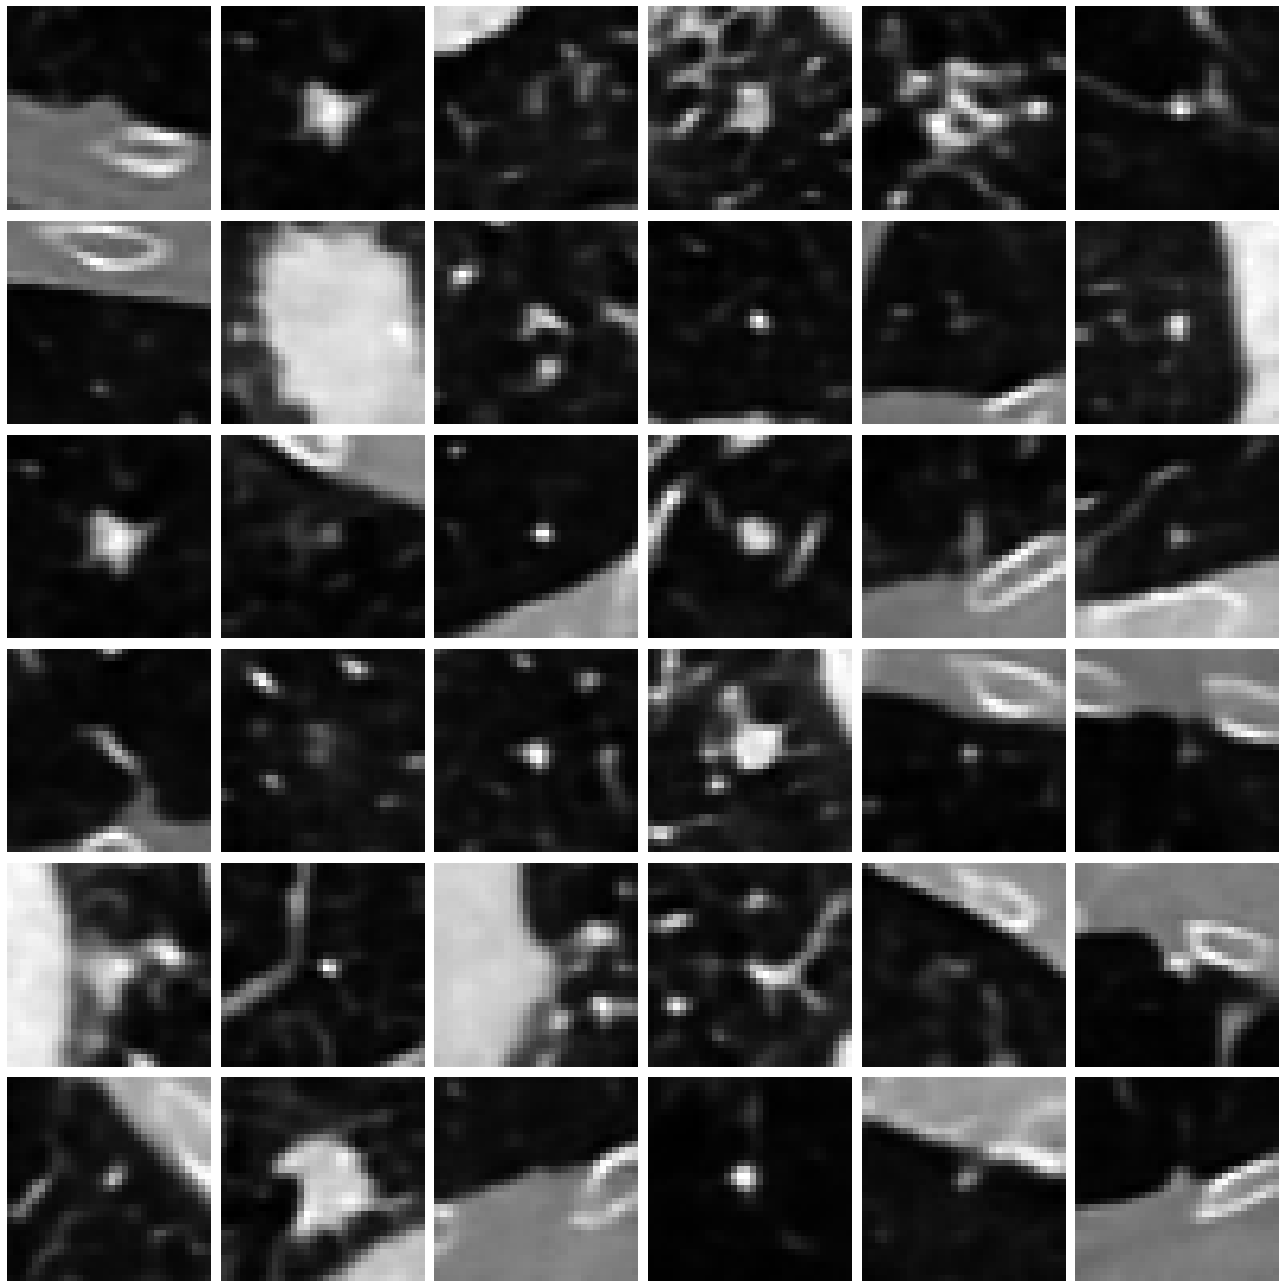

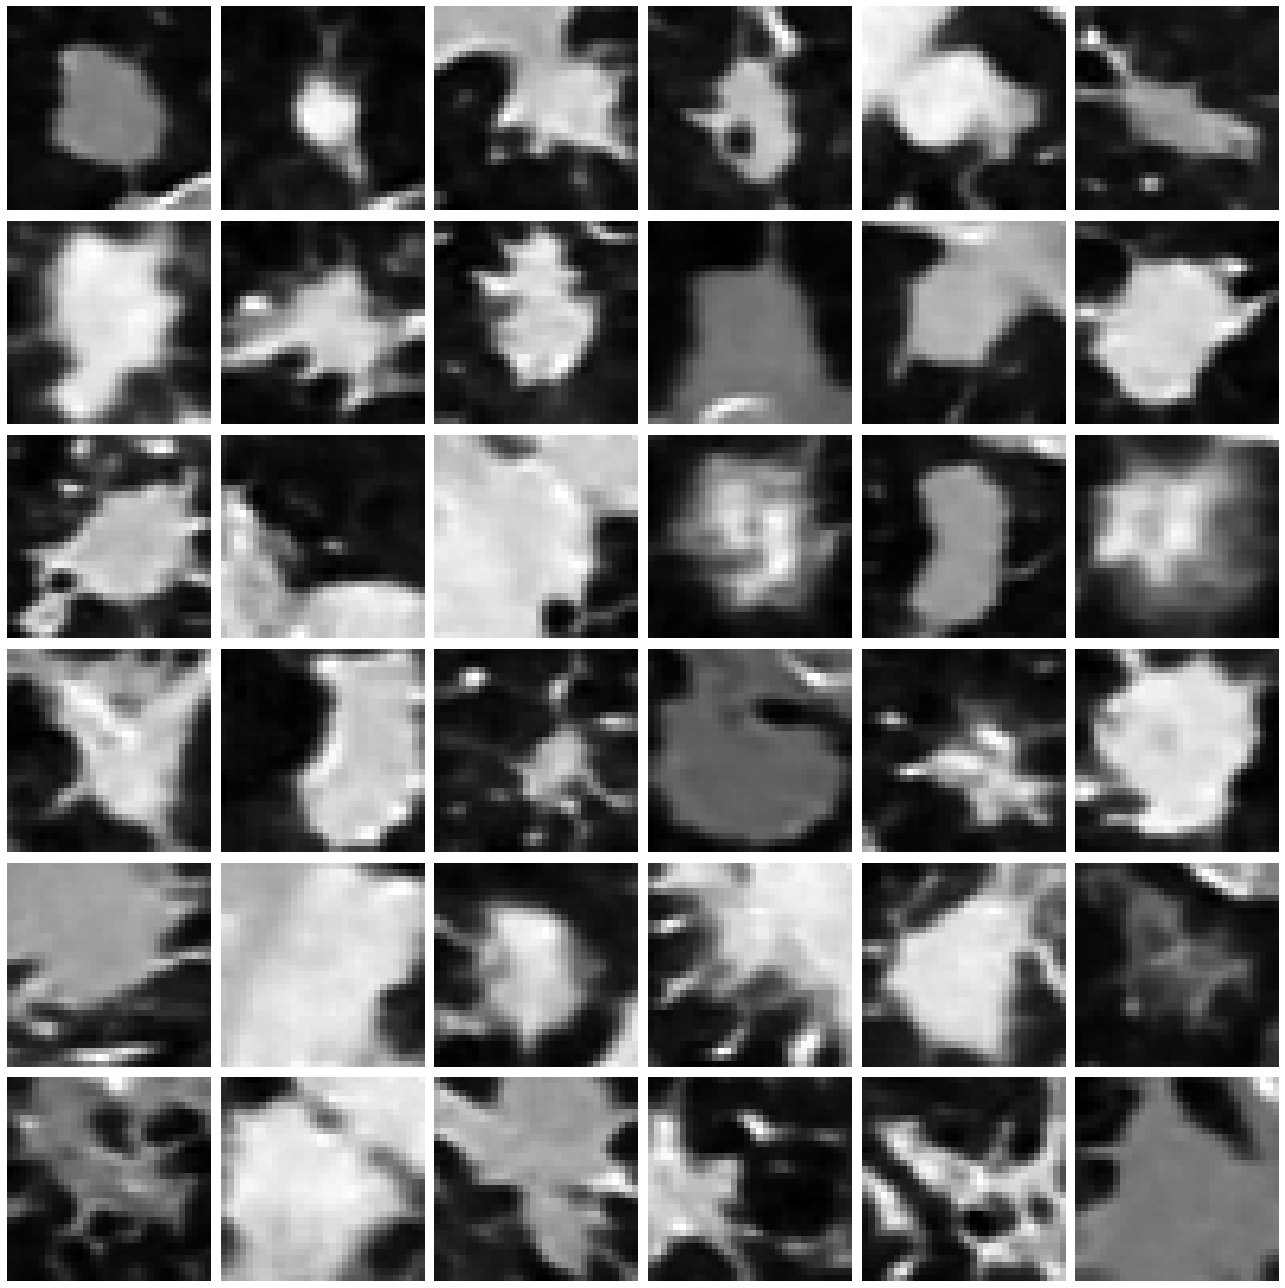

In [ ]:
%matplotlib inline
# visualize
vis3d_tensor(lidc_median_imgs)
vis3d_tensor(lndb_median_imgs)
vis3d_tensor(stf_median_imgs)

In [ ]:
# calculate the diff vector using the centroids of the embeddings of
# lidc and stanford dataset
lidc_centroid = torch.mean(lidc_embeddings_median, axis=0)
stf_centroid = torch.mean(stf_embeddings_median, axis=0)
diff_vector = lidc_centroid - stf_centroid
print("diff vector:", diff_vector.shape)


diff vector: torch.Size([2048])


In [ ]:
 # visualize the smallest of the stanford dataset
stf_smallest_idx = stf_volume.argsort()[:36]
stf_smallest_embeddings = torch.from_numpy(stf_embeddings_train[stf_smallest_idx][:,:2048]).type(torch.float32)
stf_smallest_imgs = evaluator.generate(stf_smallest_embeddings)
vis3d_tensor(stf_smallest_imgs, save_path=osp.join(vis_dir, "stf_smallest_imgs.jpeg"))

[09-23 14:50:43 | visualization:vis3d_tensor] save image to /labs/gevaertlab/users/yyhhli/code/vae/EDA/image_synthesize_experiment/results/stf_smallest_imgs.jpeg


In [ ]:
# use this batch to perform enlarge and shrink by adding or subtracting the diff vector
# to the embeddings
stf_smallest_embeddings_enlarge = stf_smallest_embeddings + diff_vector
stf_smallest_embeddings_shrink = stf_smallest_embeddings - diff_vector
stf_smallest_imgs_enlarge = evaluator.generate(stf_smallest_embeddings_enlarge)
stf_smallest_imgs_shrink = evaluator.generate(stf_smallest_embeddings_shrink)
vis3d_tensor(stf_smallest_imgs_enlarge, save_path=osp.join(vis_dir, "stf_smallest_imgs_enlarge.jpeg"))
vis3d_tensor(stf_smallest_imgs_shrink, save_path=osp.join(vis_dir, "stf_smallest_imgs_shrink.jpeg"))


[09-23 14:50:48 | visualization:vis3d_tensor] save image to /labs/gevaertlab/users/yyhhli/code/vae/EDA/image_synthesize_experiment/results/stf_smallest_imgs_enlarge.jpeg
[09-23 14:50:52 | visualization:vis3d_tensor] save image to /labs/gevaertlab/users/yyhhli/code/vae/EDA/image_synthesize_experiment/results/stf_smallest_imgs_shrink.jpeg


In [24]:
# get the indexes of the smallest of the stanford dataset
print("smallest_idx:", stf_smallest_idx)


smallest_idx: [24 76 42 38  2 11 85 50 77  5 51  1 56 83 45  0 44 48 36 43 59 25 35 19
 29 94 53 49 84  9 72 71 37 13 20 99]


In [27]:
# save tensor images for enlarging and shrinking images
# save in H5 file
import h5py

# save images
with h5py.File(osp.join(vis_dir, "stf_synth_imgs.h5"), "w") as f:
    f.create_dataset("shrink", data=stf_smallest_imgs_shrink.detach().numpy())
    f.create_dataset("enlarge", data=stf_smallest_imgs_enlarge.detach().numpy())
    f.create_dataset("original", data=stf_smallest_imgs.detach().numpy())
    f.create_dataset(name="smallest_idx", data=stf_smallest_idx)
